In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

### sklearn.datasets contains some sample predefined datasets ... from that we are working with digit dataset.

there are totally 1797 hand witten images of size 8x8 .  here we are going to identify which digit the image belongs to .

In [2]:
digits =load_digits()

In [3]:
dir(digits)  # this give what the data set contains

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [4]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 640x480 with 0 Axes>

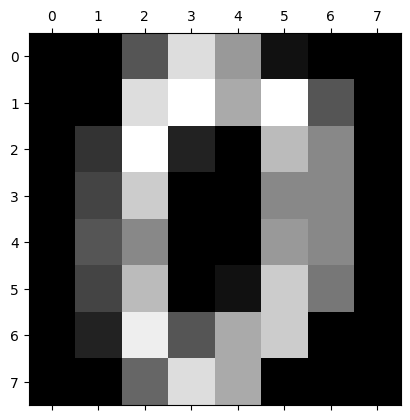

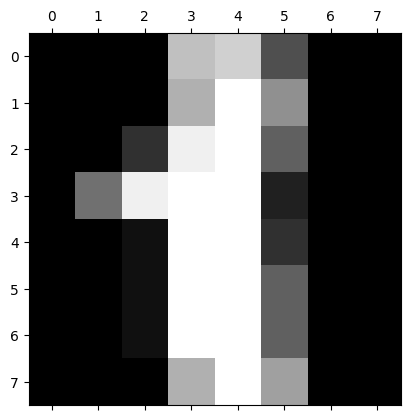

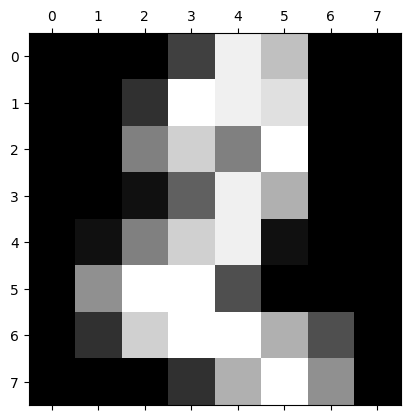

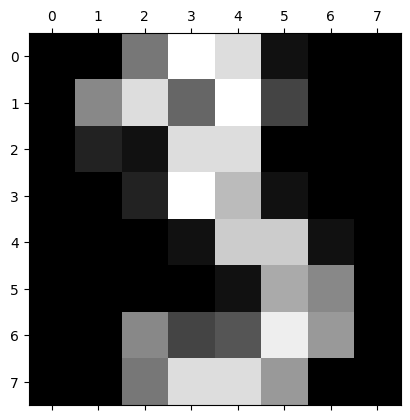

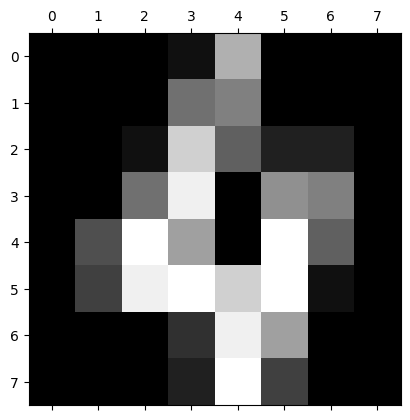

In [5]:
plt.gray()
for i in range(5):
  plt.matshow(digits.images[i])

In [6]:
digits.target[0:5]

# here target is nothing but  : for image 1 we get 1 as the output number

array([0, 1, 2, 3, 4])

In [7]:
# now we use the data and target to train our model

from sklearn.model_selection import train_test_split


In [8]:
x_train,x_test,y_train,y_test = train_test_split(digits.data,digits.target,test_size=0.2)


In [9]:
len(x_train)
len(x_test)

360

#MODELING

In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [11]:
model.fit(x_train,y_train)

LinearRegression()

In [12]:
model.score(x_test,y_test)

0.5499506526798034

In [13]:
y_predicted = model.predict(x_test)



<h1>SEE HERE<h1>

In [14]:
y_predicted=y_predicted.astype(int)
y_predicted

array([ 6,  2,  5,  8,  3,  4,  2,  1,  3,  6,  5,  4,  3,  4,  2,  5,  7,
        2,  3,  3,  4,  2,  5,  5,  2,  4,  7,  3,  3,  3,  4,  6,  1,  3,
        2,  6,  6,  3,  4,  7,  3,  5,  3,  2,  2,  4,  4,  5,  2,  6,  2,
        4,  5,  1,  4,  7,  8,  4,  6,  5,  8,  7,  3,  4,  2,  3,  6,  3,
        6,  0,  5,  4,  3,  6,  6,  4,  6,  2,  4,  1,  4,  6,  1,  3,  7,
        7,  3,  2,  3,  8,  5,  5,  2,  1,  0,  3,  5,  3,  6,  6,  3,  1,
        4,  4,  3,  2,  9,  2,  1,  5,  0,  0,  6,  1,  6,  4,  1,  2,  4,
        4,  2,  5,  8,  5,  5,  1,  5,  1,  4,  2,  1,  7,  3,  2,  3,  0,
        7,  4,  5,  7,  5,  0,  6, 10,  5,  6,  5,  6,  2,  2,  4,  5,  6,
        4,  2,  1,  1,  9,  3,  8,  5,  0,  3,  4,  2,  6,  3,  3,  4,  1,
        5,  2,  2,  2,  2,  3,  2,  7,  6,  2,  4,  6,  6,  3,  7,  3,  2,
        5,  7,  8,  6,  4,  2,  5,  6,  3,  0,  2,  4,  4,  7,  0,  3,  5,
        5,  5,  0,  1,  4,  5,  5,  4,  0,  3,  2,  3,  3,  4,  3,  3,  2,
        8,  1,  7,  2,  6

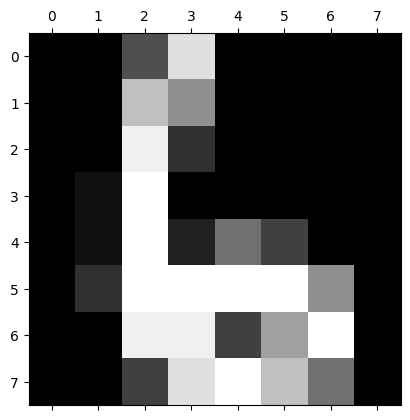

In [15]:
# lets predict with the data not with images :
plt.matshow(digits.images[67])

In [16]:
digits.target[67]

6

In [17]:
model.predict([digits.data[67]])

array([5.81509338])

In [18]:
model.predict(digits.data[0:5])

array([2.63163557, 1.2294011 , 2.34954583, 3.01098567, 4.42135698])

# here our prediction is failed .. so we want to learn where the prediction went wrong


In [19]:
#confusion matrix
from sklearn.metrics import confusion_matrix

In [20]:
from sklearn.metrics import confusion_matrix

# helpful to visuvalize how well the model is doing.


cn = confusion_matrix(y_test, y_predicted)
cn


array([[ 8, 12, 11,  4,  0,  0,  0,  0,  0,  0,  0],
       [ 4,  4, 15, 11,  6,  1,  0,  0,  0,  0,  0],
       [ 6,  8, 10, 13,  1,  0,  0,  0,  0,  0,  0],
       [ 2,  2,  3, 14, 11,  7,  1,  0,  0,  0,  0],
       [ 0,  1,  7,  8,  9,  7,  3,  1,  0,  0,  0],
       [ 0,  0,  1,  8, 10,  9,  4,  1,  0,  0,  0],
       [ 0,  0,  2,  2, 11, 12,  8,  1,  0,  0,  0],
       [ 0,  0,  0,  2,  3,  2, 11,  8,  4,  0,  0],
       [ 0,  1,  2,  0,  5, 12,  9,  5,  3,  0,  1],
       [ 0,  0,  0,  3,  4,  6,  9,  7,  2,  2,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]])

Text(95.72222222222221, 0.5, 'True')

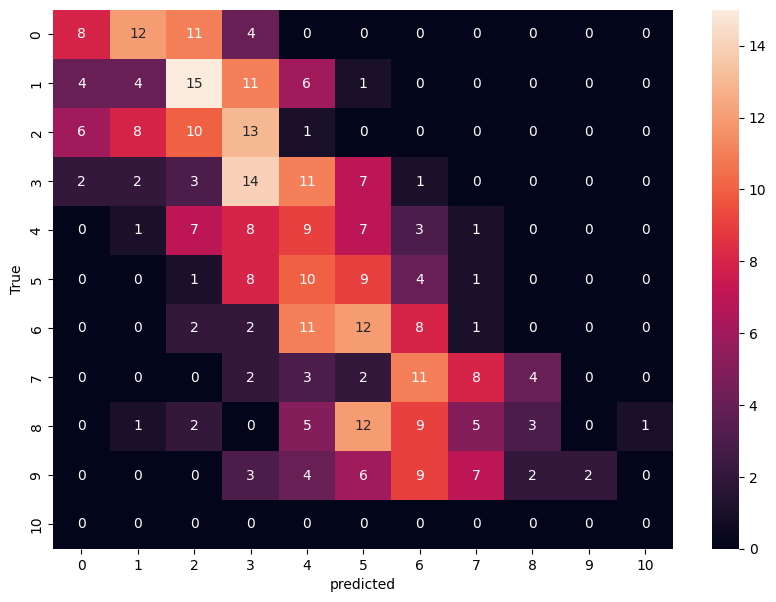

In [21]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cn,annot=True)
plt.xlabel('predicted')
plt.ylabel('True')

In [22]:
# this heat map says - if we consider 14 .1 time it is predicted 14 as true and 1 time 14 is predicted false .



# HOME WORK

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [24]:
model = load_iris()

In [25]:
dir(model)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [26]:
model.data[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [27]:
model.target[0:5]

array([0, 0, 0, 0, 0])

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(model.data,model.target,test_size=0.2)



In [29]:
from sklearn.linear_model import LinearRegression
di = LinearRegression()


In [30]:
di.fit(x_train,y_train)

LinearRegression()

In [31]:
y_predict = di.predict(x_test)

In [32]:
di.score(x_test,y_test)

0.8733864055401916

In [33]:
di.predict([model.data[1]])

array([-0.05745411])

lets c where the mistake is :

In [34]:
print("y_test shape:", y_test.shape)
print("y_predicted shape:", y_predicted.shape)


y_test shape: (30,)
y_predicted shape: (360,)
